In [1]:
import pandas as pd
data_filled = pd.read_csv('/kaggle/input/clean-aws-month/final_data/filled_data_april.csv')
data_filled

,datetime,row,col,AWS,CAPE,EWSS,IE,ISOR,KX,PEV,...,B09B,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,WVB
0,2019-04-01 00:00:00,0,114,0.0,446.125,-641.113281,-1.391256e-05,0.588248,37.360176,-1.552980e-05,...,253.877518,261.638123,281.487091,260.333344,285.000702,269.992981,281.766937,286.364563,285.240051,244.275345
1,2019-04-01 02:00:00,0,114,9.2,519.750,-201.390625,-3.665523e-05,0.588248,36.553154,-7.004943e-05,...,250.888718,253.995895,261.295807,247.252029,262.435974,255.327316,261.579437,283.843597,262.818237,243.474976
2,2019-04-01 03:00:00,0,114,7.4,447.500,-80.894531,-4.251720e-05,0.588248,34.931915,-9.441259e-05,...,251.353149,255.523193,268.688995,252.243011,269.938660,259.248505,268.137817,288.332275,269.414612,243.472137
3,2019-04-01 04:00:00,0,114,0.0,421.500,-33.917969,-4.253280e-05,0.588248,32.517395,-1.016082e-04,...,253.576904,259.337555,277.587189,257.868683,279.395111,265.641571,276.697174,303.794434,280.188019,244.486572
4,2019-04-01 05:00:00,0,114,0.0,435.625,11.640625,-3.927853e-05,0.588248,31.718704,-1.184619e-04,...,252.470215,256.889984,267.289856,251.395325,268.833862,260.088013,267.634430,295.567719,269.526978,244.371689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305841,2020-04-30 15:00:00,87,136,0.0,0.000,-147.175781,-3.008172e-07,0.451531,18.691154,1.413049e-06,...,247.044312,257.513306,287.684387,266.369995,290.795715,273.963531,288.081757,288.043854,290.945465,237.822235
305842,2020-04-30 16:00:00,87,136,0.0,0.000,-136.785156,-4.866160e-07,0.451531,19.257614,8.500647e-07,...,247.044312,257.394440,288.030670,266.547974,291.081146,274.016266,288.324829,288.515076,291.247101,238.106689
305843,2020-04-30 17:00:00,87,136,0.0,0.125,-149.906250,-5.792826e-07,0.451531,19.833664,1.108972e-06,...,247.044312,257.156647,288.779022,267.184998,291.730865,274.280029,288.783844,291.008331,291.946655,238.106689
305844,2020-04-30 18:00:00,87,136,0.0,1.000,-163.746094,-6.982591e-07,0.451531,20.747620,1.759734e-06,...,247.201431,257.513306,286.947357,266.185760,290.144287,273.840424,287.788666,286.745850,290.130890,238.106689


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Cài đặt 
!pip install xgboost
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1
import warnings
warnings.simplefilter('ignore', FutureWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.2 MB/s eta 0:00:0000:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


# 1. Xử lý dữ liệu bị thiếu

In [ ]:
# df_cleaned = data.copy()
# df_cleaned = df_cleaned.drop(columns=['B04B', 'B05B', 'B06B', 'VSB', 'CIN'])

# df_cleaned = df_cleaned[~((df_cleaned['AWS'] == -np.inf) | (df_cleaned['AWS'].isnull()))]
# df_cleaned = df_cleaned[~((df_cleaned['SLHF'] == 9999) | (df_cleaned['SSHF'] == 9999))]

In [ ]:
# data_filled = df_cleaned.fillna(df_cleaned.median(numeric_only=True))

# 2. Chia train test

In [3]:
def split_by_day(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['date'] = df['datetime'].dt.date

    # Lấy danh sách ngày duy nhất
    unique_days = sorted(df['date'].unique())
    n_train_days = int(0.8 * len(unique_days))

    # Tách theo ngày
    train_days = unique_days[:n_train_days]
    test_days = unique_days[n_train_days:]

    train_df = df[df['date'].isin(train_days)].copy()
    test_df = df[df['date'].isin(test_days)].copy()

    # In thông tin
    print(f"Số ngày trong train: {len(train_days)}")
    print(f"Số ngày trong test: {len(test_days)}")
    print(f"Train shape: {train_df.shape}")
    print(f"Test shape: {test_df.shape}")
    print(f"Ngày trong train:\n{np.array(train_days)}")
    print(f"Ngày trong test:\n{np.array(test_days)}")

    # Xóa cột phụ trợ 'date'
    train_df.drop(columns='date', inplace=True)
    test_df.drop(columns='date', inplace=True)

    return train_df, test_df

# Chia lại cho từng tháng
train_df, test_df = split_by_day(data_filled)

Số ngày trong train: 48
Số ngày trong test: 12
Train shape: (249931, 34)
Test shape: (55915, 34)
Ngày trong train:
[datetime.date(2019, 4, 1) datetime.date(2019, 4, 2)
 datetime.date(2019, 4, 3) datetime.date(2019, 4, 4)
 datetime.date(2019, 4, 5) datetime.date(2019, 4, 6)
 datetime.date(2019, 4, 7) datetime.date(2019, 4, 8)
 datetime.date(2019, 4, 9) datetime.date(2019, 4, 10)
 datetime.date(2019, 4, 11) datetime.date(2019, 4, 12)
 datetime.date(2019, 4, 13) datetime.date(2019, 4, 14)
 datetime.date(2019, 4, 15) datetime.date(2019, 4, 16)
 datetime.date(2019, 4, 17) datetime.date(2019, 4, 18)
 datetime.date(2019, 4, 19) datetime.date(2019, 4, 20)
 datetime.date(2019, 4, 21) datetime.date(2019, 4, 22)
 datetime.date(2019, 4, 23) datetime.date(2019, 4, 24)
 datetime.date(2019, 4, 25) datetime.date(2019, 4, 26)
 datetime.date(2019, 4, 27) datetime.date(2019, 4, 28)
 datetime.date(2019, 4, 29) datetime.date(2019, 4, 30)
 datetime.date(2020, 4, 1) datetime.date(2020, 4, 2)
 datetime.date(2

In [4]:
X_train = train_df.drop(columns=['AWS', 'datetime', 'row', 'col'])
y_train = (train_df['AWS'] > 0).astype(int)

X_test = test_df.drop(columns=['AWS', 'datetime', 'row', 'col'])
y_test = (test_df['AWS'] > 0).astype(int)

# 3. Chuẩn hóa

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 4. Chọn feature

In [7]:
top_features = ['CAPE', 'KX', 'R500', 'R850', 'TCLW', 'TCW', 'U250', 'U850', 'V250', 'V850', 'B10B', 'B11B', 'B14B', 'I2B', 'I4B', 'IRB', 'WVB']

In [8]:
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]

In [9]:
#Performance evaluation
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

# 5. Thêm class weight

In [10]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

Learning rate set to 0.108844
0:	learn: 0.5521986	total: 96.4ms	remaining: 1m 36s
1:	learn: 0.4538899	total: 134ms	remaining: 1m 7s
2:	learn: 0.3863632	total: 167ms	remaining: 55.5s
3:	learn: 0.3374000	total: 199ms	remaining: 49.5s
4:	learn: 0.3007576	total: 231ms	remaining: 45.9s
5:	learn: 0.2759922	total: 264ms	remaining: 43.8s
6:	learn: 0.2583400	total: 298ms	remaining: 42.3s
7:	learn: 0.2441893	total: 330ms	remaining: 40.9s
8:	learn: 0.2323962	total: 364ms	remaining: 40s
9:	learn: 0.2255119	total: 391ms	remaining: 38.7s
10:	learn: 0.2191463	total: 424ms	remaining: 38.1s
11:	learn: 0.2141879	total: 455ms	remaining: 37.5s
12:	learn: 0.2108322	total: 484ms	remaining: 36.7s
13:	learn: 0.2074025	total: 515ms	remaining: 36.3s
14:	learn: 0.2047701	total: 548ms	remaining: 36s
15:	learn: 0.2029057	total: 576ms	remaining: 35.4s
16:	learn: 0.2011989	total: 603ms	remaining: 34.8s
17:	learn: 0.1992608	total: 636ms	remaining: 34.7s
18:	learn: 0.1979036	total: 669ms	remaining: 34.5s
19:	learn: 0.

In [11]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_train_scaled, y_train)

# Predict
y_pred = cat_model.predict(X_test_scaled)

print_scores(y_test, y_pred)

Learning rate set to 0.108844
0:	learn: 0.5521986	total: 37.3ms	remaining: 37.3s
1:	learn: 0.4538899	total: 69.1ms	remaining: 34.5s
2:	learn: 0.3863632	total: 103ms	remaining: 34.2s
3:	learn: 0.3374000	total: 136ms	remaining: 33.8s
4:	learn: 0.3007576	total: 169ms	remaining: 33.6s
5:	learn: 0.2759922	total: 203ms	remaining: 33.6s
6:	learn: 0.2583400	total: 238ms	remaining: 33.8s
7:	learn: 0.2441893	total: 271ms	remaining: 33.6s
8:	learn: 0.2323962	total: 306ms	remaining: 33.7s
9:	learn: 0.2255119	total: 334ms	remaining: 33s
10:	learn: 0.2191463	total: 366ms	remaining: 32.9s
11:	learn: 0.2141879	total: 397ms	remaining: 32.7s
12:	learn: 0.2108322	total: 427ms	remaining: 32.4s
13:	learn: 0.2074025	total: 458ms	remaining: 32.3s
14:	learn: 0.2047701	total: 491ms	remaining: 32.2s
15:	learn: 0.2029057	total: 519ms	remaining: 31.9s
16:	learn: 0.2011989	total: 545ms	remaining: 31.5s
17:	learn: 0.1992608	total: 577ms	remaining: 31.5s
18:	learn: 0.1979036	total: 610ms	remaining: 31.5s
19:	learn: 

In [13]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_train_selected, y_train)

# Predict
y_pred = cat_model.predict(X_test_selected)

print_scores(y_test, y_pred)

Learning rate set to 0.108844
0:	learn: 0.5584954	total: 31ms	remaining: 31s
1:	learn: 0.4595144	total: 57.2ms	remaining: 28.5s
2:	learn: 0.3895182	total: 83.2ms	remaining: 27.7s
3:	learn: 0.3407859	total: 112ms	remaining: 27.8s
4:	learn: 0.3038933	total: 141ms	remaining: 28s
5:	learn: 0.2790943	total: 168ms	remaining: 27.8s
6:	learn: 0.2601303	total: 197ms	remaining: 27.9s
7:	learn: 0.2441929	total: 225ms	remaining: 27.9s
8:	learn: 0.2338477	total: 252ms	remaining: 27.7s
9:	learn: 0.2262744	total: 278ms	remaining: 27.5s
10:	learn: 0.2191960	total: 306ms	remaining: 27.5s
11:	learn: 0.2141007	total: 334ms	remaining: 27.5s
12:	learn: 0.2098969	total: 362ms	remaining: 27.5s
13:	learn: 0.2067523	total: 387ms	remaining: 27.3s
14:	learn: 0.2042871	total: 415ms	remaining: 27.2s
15:	learn: 0.2024116	total: 439ms	remaining: 27s
16:	learn: 0.2003887	total: 465ms	remaining: 26.9s
17:	learn: 0.1988400	total: 490ms	remaining: 26.7s
18:	learn: 0.1976552	total: 516ms	remaining: 26.6s
19:	learn: 0.196

=> Scale cao hơn

=> Không chọn đặc trưng cao hơn

In [14]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=13.09729821196909,     # tương đương XGBoost
    random_seed=42,
    #verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

0:	learn: 0.6738090	total: 9.9s	remaining: 49m 21s
1:	learn: 0.6574150	total: 9.91s	remaining: 24m 36s
2:	learn: 0.6418829	total: 9.92s	remaining: 16m 21s
3:	learn: 0.6276537	total: 9.93s	remaining: 12m 14s
4:	learn: 0.6155271	total: 9.93s	remaining: 9m 45s
5:	learn: 0.6040207	total: 9.94s	remaining: 8m 6s
6:	learn: 0.5933238	total: 9.94s	remaining: 6m 56s
7:	learn: 0.5835675	total: 9.95s	remaining: 6m 3s
8:	learn: 0.5748769	total: 9.96s	remaining: 5m 21s
9:	learn: 0.5671508	total: 9.96s	remaining: 4m 48s
10:	learn: 0.5595238	total: 9.97s	remaining: 4m 21s
11:	learn: 0.5529816	total: 9.97s	remaining: 3m 59s
12:	learn: 0.5469111	total: 9.98s	remaining: 3m 40s
13:	learn: 0.5416289	total: 9.99s	remaining: 3m 24s
14:	learn: 0.5362613	total: 9.99s	remaining: 3m 9s
15:	learn: 0.5312911	total: 10s	remaining: 2m 57s
16:	learn: 0.5269976	total: 10s	remaining: 2m 46s
17:	learn: 0.5229544	total: 10s	remaining: 2m 36s
18:	learn: 0.5189213	total: 10s	remaining: 2m 28s
19:	learn: 0.5152915	total: 10

=> Recall cao, f1 và precision không cao lắm

In [ ]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    scale_pos_weight=11.32,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train_scaled, y_train)

# Predict
y_pred = cat_model.predict(X_test_scaled)

print_scores(y_test, y_pred)

In [16]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=13.09729821196909,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train_selected, y_train)

# Predict
y_pred = cat_model.predict(X_test_selected)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     50316
           1       0.23      0.90      0.36      5599

    accuracy                           0.68     55915
   macro avg       0.60      0.78      0.57     55915
weighted avg       0.91      0.68      0.75     55915



=> Chứng tỏ với bộ tham số khác, selected ngang ngửa với scale, thấp hơn chút.

=> **train = train_scaled > selected**

CatBoost không cần chuẩn hóa.

**Nhận xét về CatBoost:**

| Thử nghiệm            | Precision lớp 1 | Recall lớp 1 | F1 lớp 1 | Nhận xét chính |
|------------------------|------------------|---------------|------------|----------------|
| CatBoost mặc định       | 0.66             | 0.47          | 0.55       | Thiên lệch lớp 0 |
| + weight 3.36          | 0.53             | 0.88          | 0.66       | Phát hiện mưa tốt hơn |
| + chuẩn hóa            | 0.52             | 0.88          | 0.65       | Không cải thiện nhiều |
| + giảm đặc trưng       | 0.51             | 0.86          | 0.64       | Hiệu quả giảm nhẹ |

* CatBoost không cần chuẩn hóa.

=> Giải pháp:
* Sử dụng Voting hoặc Stacking:
Nếu CatBoost nghiêng về phát hiện lớp 1 thì kết hợp với mô hình có xu hướng khác (như RF nghiêng về lớp 0) để có Voting hoặc Stacking ổn định hơn.

Best threshold: 0.8, F1: 0.44028899277518063


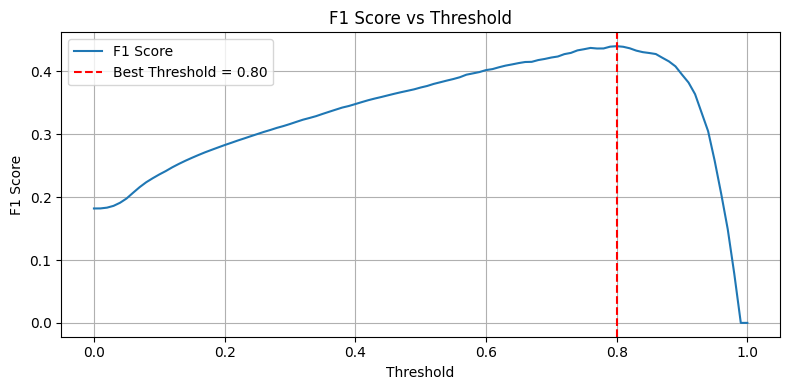

In [17]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=13.09729821196909,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test)[:, 1]

import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# Tìm ngưỡng tốt nhất
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best threshold: {best_thresh}, F1: {best_f1}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Tuning CatBoost với Optuna**

In [20]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
SCALE_POS_WEIGHT = 13.09729821196909

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'task_type': 'GPU',
        'scale_pos_weight': SCALE_POS_WEIGHT,
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 06:27:16,963] A new study created in memory with name: no-name-c8178387-9530-4a82-b8fa-16686428523f
[I 2025-05-04 06:27:23,063] Trial 0 finished with value: 0.4009247664001541 and parameters: {'iterations': 234, 'depth': 10, 'learning_rate': 0.08218603662459258}. Best is trial 0 with value: 0.4009247664001541.
[I 2025-05-04 06:27:25,134] Trial 1 finished with value: 0.4225254072114715 and parameters: {'iterations': 274, 'depth': 4, 'learning_rate': 0.011380802668741509}. Best is trial 1 with value: 0.4225254072114715.
[I 2025-05-04 06:27:28,687] Trial 2 finished with value: 0.43109818410502326 and parameters: {'iterations': 435, 'depth': 6, 'learning_rate': 0.11864496016942552}. Best is trial 2 with value: 0.43109818410502326.
[I 2025-05-04 06:27:36,642] Trial 3 finished with value: 0.3534034193479877 and parameters: {'iterations': 293, 'depth': 10, 'learning_rate': 0.27102691027746895}. Best is trial 2 with value: 0.43109818410502326.
[I 2025-05-04 06:27:40,511] Trial 4 

Best trial:
FrozenTrial(number=34, state=1, values=[0.44766418415707515], datetime_start=datetime.datetime(2025, 5, 4, 6, 28, 51, 57215), datetime_complete=datetime.datetime(2025, 5, 4, 6, 28, 52, 550698), params={'iterations': 121, 'depth': 4, 'learning_rate': 0.23804431880189653}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None)}, trial_id=34, value=None)
Best F1 Score: 0.44766418415707515
Best hyperparameters:
iterations: 121
depth: 4
learning_rate: 0.23804431880189653

Classification report with threshold = 0.8:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     50316
           1       0.36      0.61      0.45      5599

    accuracy                           0.85     55915
   macro avg       0.66      0.

In [21]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=292,
#     depth=5,
#     learning_rate=0.25030502714970054,
#     scale_pos_weight=13.09729821196909,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_train, y_train)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.83
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

In [22]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=13.09729821196909,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train_selected, y_train)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test_selected)[:, 1]


y_pred = cat_model.predict(X_test_selected)
print_scores( y_test, y_pred)

y_probs = cat_model.predict_proba(X_test_selected)[:,1]

best_thresh = 0.0
best_f1 = 0.0
for t in np.arange(0.1, 0.9, 0.05):
    y_pred = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold: {best_thresh}, F1: {best_f1}")

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     50316
           1       0.23      0.90      0.36      5599

    accuracy                           0.68     55915
   macro avg       0.60      0.78      0.57     55915
weighted avg       0.91      0.68      0.75     55915

Best threshold: 0.7500000000000002, F1: 0.4216477303913497


In [24]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
SCALE_POS_WEIGHT = 13.09729821196909

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'task_type': 'GPU',
        'scale_pos_weight': SCALE_POS_WEIGHT,
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_selected, y_train)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test_selected)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train_selected, y_train)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test_selected)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 06:31:16,933] A new study created in memory with name: no-name-a8307968-058d-4567-a7cd-f8579680efa2
[I 2025-05-04 06:31:19,402] Trial 0 finished with value: 0.37600294442399707 and parameters: {'iterations': 289, 'depth': 7, 'learning_rate': 0.22838099569627834}. Best is trial 0 with value: 0.37600294442399707.
[I 2025-05-04 06:31:20,884] Trial 1 finished with value: 0.40809573705398994 and parameters: {'iterations': 159, 'depth': 6, 'learning_rate': 0.20928825959014896}. Best is trial 1 with value: 0.40809573705398994.
[I 2025-05-04 06:31:24,754] Trial 2 finished with value: 0.389326334208224 and parameters: {'iterations': 418, 'depth': 7, 'learning_rate': 0.07167527325389973}. Best is trial 1 with value: 0.40809573705398994.
[I 2025-05-04 06:31:28,388] Trial 3 finished with value: 0.39894179894179893 and parameters: {'iterations': 289, 'depth': 8, 'learning_rate': 0.07923074382473652}. Best is trial 1 with value: 0.40809573705398994.
[I 2025-05-04 06:31:31,813] Trial 4 

Best trial:
FrozenTrial(number=12, state=1, values=[0.43346947549441106], datetime_start=datetime.datetime(2025, 5, 4, 6, 31, 59, 979632), datetime_complete=datetime.datetime(2025, 5, 4, 6, 32, 2, 288614), params={'iterations': 369, 'depth': 4, 'learning_rate': 0.05321824101327062}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None)}, trial_id=12, value=None)
Best F1 Score: 0.43346947549441106
Best hyperparameters:
iterations: 369
depth: 4
learning_rate: 0.05321824101327062

Classification report with threshold = 0.7500000000000002:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     50316
           1       0.30      0.70      0.42      5599

    accuracy                           0.81     55915
   macro avg    

In [25]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=336,
#     depth=6,
#     learning_rate=0.054827476508008136,
#     scale_pos_weight=13.09729821196909,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_train_selected, y_train)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test_selected)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.85
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

In [26]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=13.09729821196909,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train_scaled, y_train)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test_scaled)[:, 1]


y_pred = cat_model.predict(X_test_scaled)
print_scores( y_test, y_pred)

y_probs = cat_model.predict_proba(X_test_scaled)[:,1]

best_thresh = 0.0
best_f1 = 0.0
for t in np.arange(0.1, 0.9, 0.05):
    y_pred = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold: {best_thresh}, F1: {best_f1}")

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     50316
           1       0.24      0.90      0.38      5599

    accuracy                           0.70     55915
   macro avg       0.61      0.79      0.59     55915
weighted avg       0.91      0.70      0.76     55915

Best threshold: 0.8000000000000002, F1: 0.448040172966941


In [28]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
SCALE_POS_WEIGHT = 13.09729821196909

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'task_type': 'GPU',
        'scale_pos_weight': SCALE_POS_WEIGHT,
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_scaled, y_train)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    'task_type': 'GPU',
    'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 06:36:22,819] A new study created in memory with name: no-name-428b7c08-c297-474f-8200-fa29406fd842
[I 2025-05-04 06:36:24,049] Trial 0 finished with value: 0.42199429320583015 and parameters: {'iterations': 121, 'depth': 6, 'learning_rate': 0.29456461905631487}. Best is trial 0 with value: 0.42199429320583015.
[I 2025-05-04 06:36:30,005] Trial 1 finished with value: 0.396661970304541 and parameters: {'iterations': 341, 'depth': 9, 'learning_rate': 0.28337582773390463}. Best is trial 0 with value: 0.42199429320583015.
[I 2025-05-04 06:36:32,152] Trial 2 finished with value: 0.42797360373410587 and parameters: {'iterations': 217, 'depth': 6, 'learning_rate': 0.2576620146460519}. Best is trial 2 with value: 0.42797360373410587.
[I 2025-05-04 06:36:41,473] Trial 3 finished with value: 0.3704697986577181 and parameters: {'iterations': 348, 'depth': 10, 'learning_rate': 0.2284882003206177}. Best is trial 2 with value: 0.42797360373410587.
[I 2025-05-04 06:36:49,915] Trial 4 fi

Best trial:
FrozenTrial(number=15, state=1, values=[0.45496374790853317], datetime_start=datetime.datetime(2025, 5, 4, 6, 37, 20, 735146), datetime_complete=datetime.datetime(2025, 5, 4, 6, 37, 22, 882565), params={'iterations': 243, 'depth': 5, 'learning_rate': 0.1072183209530057}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None)}, trial_id=15, value=None)
Best F1 Score: 0.45496374790853317
Best hyperparameters:
iterations: 243
depth: 5
learning_rate: 0.1072183209530057

Classification report with threshold = 0.8000000000000002:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     50316
           1       0.37      0.58      0.45      5599

    accuracy                           0.86     55915
   macro avg     

In [29]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=322,
#     depth=6,
#     learning_rate=0.1432105130052586,
#     scale_pos_weight=13.09729821196909,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_train_scaled, y_train)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test_scaled)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.85
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

# 6. Cân bằng dữ liệu (Oversampling)

## 6.1 SMOTE

In [30]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_sm.shape, y_sm.shape

scaler = MinMaxScaler()
# scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_sm)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features] 

In [31]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_sm, y_sm)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

Learning rate set to 0.141807
0:	learn: 0.6339633	total: 68.1ms	remaining: 1m 7s
1:	learn: 0.5876817	total: 128ms	remaining: 1m 3s
2:	learn: 0.5566484	total: 189ms	remaining: 1m 2s
3:	learn: 0.5332402	total: 243ms	remaining: 1m
4:	learn: 0.5136288	total: 304ms	remaining: 1m
5:	learn: 0.4986739	total: 359ms	remaining: 59.4s
6:	learn: 0.4864401	total: 419ms	remaining: 59.4s
7:	learn: 0.4757501	total: 477ms	remaining: 59.2s
8:	learn: 0.4671389	total: 532ms	remaining: 58.6s
9:	learn: 0.4600255	total: 592ms	remaining: 58.6s
10:	learn: 0.4538886	total: 647ms	remaining: 58.2s
11:	learn: 0.4487915	total: 708ms	remaining: 58.3s
12:	learn: 0.4427660	total: 764ms	remaining: 58s
13:	learn: 0.4382323	total: 818ms	remaining: 57.6s
14:	learn: 0.4333762	total: 877ms	remaining: 57.6s
15:	learn: 0.4231558	total: 936ms	remaining: 57.6s
16:	learn: 0.4192899	total: 993ms	remaining: 57.4s
17:	learn: 0.4161579	total: 1.04s	remaining: 57s
18:	learn: 0.4114984	total: 1.1s	remaining: 56.8s
19:	learn: 0.4077712	

In [32]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier()

# Train
cat_model.fit(X_sm[top_features], y_sm)

# Predict
y_pred = cat_model.predict(X_test[top_features])

print_scores(y_test, y_pred)

Learning rate set to 0.141807
0:	learn: 0.6340568	total: 62.7ms	remaining: 1m 2s
1:	learn: 0.5891159	total: 114ms	remaining: 56.7s
2:	learn: 0.5560697	total: 165ms	remaining: 54.8s
3:	learn: 0.5331102	total: 213ms	remaining: 53.2s
4:	learn: 0.5135971	total: 261ms	remaining: 52s
5:	learn: 0.4994746	total: 309ms	remaining: 51.3s
6:	learn: 0.4866039	total: 360ms	remaining: 51.1s
7:	learn: 0.4772697	total: 409ms	remaining: 50.7s
8:	learn: 0.4687103	total: 458ms	remaining: 50.4s
9:	learn: 0.4623990	total: 507ms	remaining: 50.2s
10:	learn: 0.4567738	total: 556ms	remaining: 50s
11:	learn: 0.4504117	total: 604ms	remaining: 49.8s
12:	learn: 0.4462506	total: 652ms	remaining: 49.5s
13:	learn: 0.4418764	total: 698ms	remaining: 49.2s
14:	learn: 0.4370775	total: 746ms	remaining: 49s
15:	learn: 0.4338096	total: 796ms	remaining: 49s
16:	learn: 0.4310346	total: 843ms	remaining: 48.7s
17:	learn: 0.4273387	total: 893ms	remaining: 48.7s
18:	learn: 0.4253460	total: 938ms	remaining: 48.5s
19:	learn: 0.42293

=> Không nên chọn đặc trưng.

In [34]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    scale_pos_weight=13.09729821196909,    # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_sm, y_sm)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.40      0.57     50316
           1       0.15      0.98      0.27      5599

    accuracy                           0.46     55915
   macro avg       0.57      0.69      0.42     55915
weighted avg       0.91      0.46      0.54     55915



In [35]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    scale_pos_weight=13.09729821196909,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_sm[top_features], y_sm)

# Predict
y_pred = cat_model.predict(X_test[top_features])

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.35      0.52     50316
           1       0.14      0.98      0.25      5599

    accuracy                           0.42     55915
   macro avg       0.57      0.67      0.39     55915
weighted avg       0.91      0.42      0.49     55915



| Cấu hình | Đặc trưng | Tùy chọn mô hình | Accuracy | F1-score lớp 1 | Nhận xét |
|----------|-----------|------------------|----------|----------------|----------|
| **SMOTE + Mặc định** | 30 | CatBoost mặc định | 0.81 | 0.59 | Kết quả tốt, cân bằng giữa hai lớp |
| **SMOTE + Mặc định** | 10 | CatBoost mặc định | 0.80 | 0.57 | Giảm nhẹ khi giảm đặc trưng |
| **SMOTE + Tuning** | 30 | 300 iter, depth=6, LR=0.05, SPW=3.36 | 0.67 | 0.57 | Accuracy thấp hơn dù precision cao |
| **SMOTE + Tuning** | 10 | như trên | 0.65 | 0.55 | Kết quả kém hơn khi giảm đặc trưng |

=> Bỏ scaled_pos_weight vì đã dùng SMOTE, không giảm đặc trưng

Best Threshold: 0.66, F1: 0.45514622104063807


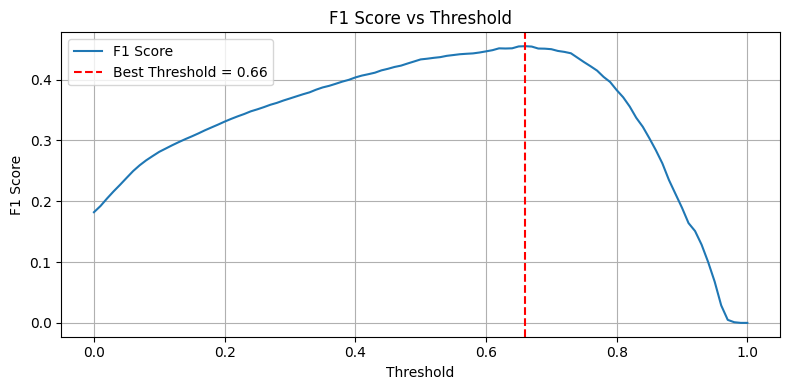

In [36]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    # scale_pos_weight=13.09729821196909,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_sm, y_sm)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test)[:, 1]

import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# Tìm ngưỡng tốt nhất
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best Threshold: {best_thresh}, F1: {best_f1}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
# SCALE_POS_WEIGHT = 13.09729821196909

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "depth": trial.suggest_int("depth", 4, 8),  
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),  # Giảm rate
        "task_type": 'GPU',
        "random_seed": 42,
        "verbose": 0,
    }

    model = CatBoostClassifier(**params)
    model.fit(X_sm, y_sm)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    # 'scale_pos_weight': SCALE_POS_WEIGHT,
    'task_type': 'GPU',
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_sm, y_sm)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 06:50:59,544] A new study created in memory with name: no-name-e0b25241-775a-4b62-89fc-463c530e64a8
[I 2025-05-04 06:51:02,856] Trial 0 finished with value: 0.45527816001572635 and parameters: {'iterations': 359, 'depth': 6, 'learning_rate': 0.02378335458565396}. Best is trial 0 with value: 0.45527816001572635.
[I 2025-05-04 06:51:06,664] Trial 1 finished with value: 0.4225128814902893 and parameters: {'iterations': 430, 'depth': 5, 'learning_rate': 0.11405028122465719}. Best is trial 0 with value: 0.45527816001572635.
[I 2025-05-04 06:51:08,586] Trial 2 finished with value: 0.44238523024686993 and parameters: {'iterations': 114, 'depth': 6, 'learning_rate': 0.11073088730756162}. Best is trial 0 with value: 0.45527816001572635.
[I 2025-05-04 06:51:13,542] Trial 3 finished with value: 0.3813830373883313 and parameters: {'iterations': 334, 'depth': 8, 'learning_rate': 0.14911422605369543}. Best is trial 0 with value: 0.45527816001572635.
[I 2025-05-04 06:51:15,617] Trial 4 

Best trial:
FrozenTrial(number=12, state=1, values=[0.46409136714813576], datetime_start=datetime.datetime(2025, 5, 4, 6, 51, 41, 180312), datetime_complete=datetime.datetime(2025, 5, 4, 6, 51, 43, 384566), params={'iterations': 218, 'depth': 4, 'learning_rate': 0.07324202507546632}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=8, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.15, log=False, low=0.01, step=None)}, trial_id=12, value=None)
Best F1 Score: 0.46409136714813576
Best hyperparameters:
iterations: 218
depth: 4
learning_rate: 0.07324202507546632

Classification report with threshold = 0.66:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     50316
           1       0.37      0.62      0.46      5599

    accuracy                           0.86     55915
   macro avg       0.66      

In [ ]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=395,
#     depth=4,
#     learning_rate=0.10643275132479328,
#     # scale_pos_weight=13.09729821196909,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_sm, y_sm)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.7
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

## 6.2 SMOTE ENN

In [40]:
# SMOTE ENN
from imblearn.combine import SMOTEENN

smenn = SMOTEENN()

X_smenn, y_smenn = smenn.fit_resample(X_train, y_train)
X_smenn.shape, y_sm.shape

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_smenn)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features] 


In [41]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(task_type='GPU')

# Train
cat_model.fit(X_smenn, y_smenn)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

Learning rate set to 0.024307
0:	learn: 0.6768240	total: 8.55ms	remaining: 8.54s
1:	learn: 0.6617402	total: 15.6ms	remaining: 7.8s
2:	learn: 0.6473928	total: 22.7ms	remaining: 7.53s
3:	learn: 0.6343086	total: 29.5ms	remaining: 7.35s
4:	learn: 0.6221538	total: 36.5ms	remaining: 7.26s
5:	learn: 0.6106749	total: 43.4ms	remaining: 7.18s
6:	learn: 0.5995908	total: 50.2ms	remaining: 7.12s
7:	learn: 0.5901592	total: 57.3ms	remaining: 7.1s
8:	learn: 0.5811154	total: 64.2ms	remaining: 7.06s
9:	learn: 0.5721942	total: 71ms	remaining: 7.03s
10:	learn: 0.5633021	total: 77.9ms	remaining: 7s
11:	learn: 0.5551112	total: 84.7ms	remaining: 6.97s
12:	learn: 0.5475031	total: 91.7ms	remaining: 6.96s
13:	learn: 0.5397692	total: 98.6ms	remaining: 6.95s
14:	learn: 0.5328293	total: 105ms	remaining: 6.92s
15:	learn: 0.5264593	total: 112ms	remaining: 6.92s
16:	learn: 0.5204764	total: 119ms	remaining: 6.91s
17:	learn: 0.5142668	total: 126ms	remaining: 6.9s
18:	learn: 0.5089180	total: 133ms	remaining: 6.89s
19:	l

In [42]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(task_type='GPU')

# Train
cat_model.fit(X_train_scaled, y_smenn)

# Predict
y_pred = cat_model.predict(X_test_scaled)

print_scores(y_test, y_pred)

Learning rate set to 0.024307
0:	learn: 0.6768239	total: 7.78ms	remaining: 7.78s
1:	learn: 0.6617400	total: 14.8ms	remaining: 7.41s
2:	learn: 0.6473905	total: 21.8ms	remaining: 7.26s
3:	learn: 0.6343078	total: 28.9ms	remaining: 7.19s
4:	learn: 0.6221532	total: 35.9ms	remaining: 7.14s
5:	learn: 0.6106741	total: 43ms	remaining: 7.12s
6:	learn: 0.5995898	total: 50.1ms	remaining: 7.1s
7:	learn: 0.5901586	total: 57ms	remaining: 7.07s
8:	learn: 0.5811144	total: 64.1ms	remaining: 7.05s
9:	learn: 0.5721933	total: 71ms	remaining: 7.03s
10:	learn: 0.5633016	total: 78.1ms	remaining: 7.03s
11:	learn: 0.5551106	total: 85.1ms	remaining: 7s
12:	learn: 0.5475027	total: 92.1ms	remaining: 6.99s
13:	learn: 0.5397699	total: 99.1ms	remaining: 6.98s
14:	learn: 0.5328296	total: 106ms	remaining: 6.96s
15:	learn: 0.5264595	total: 113ms	remaining: 6.95s
16:	learn: 0.5204770	total: 120ms	remaining: 6.94s
17:	learn: 0.5142673	total: 127ms	remaining: 6.93s
18:	learn: 0.5089185	total: 134ms	remaining: 6.92s
19:	lea

=> Không chọn đặc trưng, scale cũng có cải thiện.

In [43]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(task_type='GPU')

# Train
cat_model.fit(X_train_scaled[top_features], y_smenn)

# Predict
y_pred = cat_model.predict(X_test_selected)

print_scores(y_test, y_pred)

Learning rate set to 0.024307
0:	learn: 0.6771389	total: 8.32ms	remaining: 8.31s
1:	learn: 0.6621046	total: 15.4ms	remaining: 7.7s
2:	learn: 0.6476594	total: 22.7ms	remaining: 7.55s
3:	learn: 0.6341090	total: 30ms	remaining: 7.46s
4:	learn: 0.6228276	total: 37.1ms	remaining: 7.39s
5:	learn: 0.6118959	total: 44.5ms	remaining: 7.37s
6:	learn: 0.6010762	total: 51.5ms	remaining: 7.31s
7:	learn: 0.5914255	total: 59.3ms	remaining: 7.35s
8:	learn: 0.5816728	total: 66.8ms	remaining: 7.35s
9:	learn: 0.5725647	total: 74.2ms	remaining: 7.34s
10:	learn: 0.5641805	total: 81.7ms	remaining: 7.35s
11:	learn: 0.5557195	total: 89ms	remaining: 7.33s
12:	learn: 0.5482494	total: 96.4ms	remaining: 7.32s
13:	learn: 0.5404623	total: 103ms	remaining: 7.26s
14:	learn: 0.5338480	total: 110ms	remaining: 7.21s
15:	learn: 0.5274426	total: 117ms	remaining: 7.17s
16:	learn: 0.5215601	total: 123ms	remaining: 7.13s
17:	learn: 0.5157534	total: 130ms	remaining: 7.1s
18:	learn: 0.5099932	total: 137ms	remaining: 7.06s
19:	

In [45]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    scale_pos_weight=13.09729821196909,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_smenn, y_smenn)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.46      0.63     50316
           1       0.17      0.97      0.29      5599

    accuracy                           0.51     55915
   macro avg       0.58      0.72      0.46     55915
weighted avg       0.91      0.51      0.60     55915



In [47]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=13.09729821196909,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_smenn, y_smenn)

# Predict
y_pred = cat_model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     50316
           1       0.29      0.76      0.42      5599

    accuracy                           0.79     55915
   macro avg       0.63      0.78      0.65     55915
weighted avg       0.90      0.79      0.83     55915



=> Không dùng scale_pos_weight

In [48]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=13.09729821196909,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train_scaled, y_smenn)

# Predict
y_pred = cat_model.predict(X_test_scaled)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     50316
           1       0.29      0.76      0.42      5599

    accuracy                           0.79     55915
   macro avg       0.63      0.78      0.65     55915
weighted avg       0.90      0.79      0.83     55915



=> Dùng scale hay không đều được

In [49]:
from catboost import CatBoostClassifier

# Khởi tạo CatBoost model với xử lý mất cân bằng
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=13.09729821196909,     # tương đương XGBoost
    random_seed=42,
    verbose=0               # tắt output training
)

# Train
cat_model.fit(X_train_scaled[top_features], y_smenn)

# Predict
y_pred = cat_model.predict(X_test_selected)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     50316
           1       0.25      0.81      0.38      5599

    accuracy                           0.74     55915
   macro avg       0.61      0.77      0.61     55915
weighted avg       0.90      0.74      0.79     55915



**Tuning CatBoost chỉ SMOTE ENN với Optuna**

Best Threshold: 0.63, Best F1 Score : 0.45385450597176985


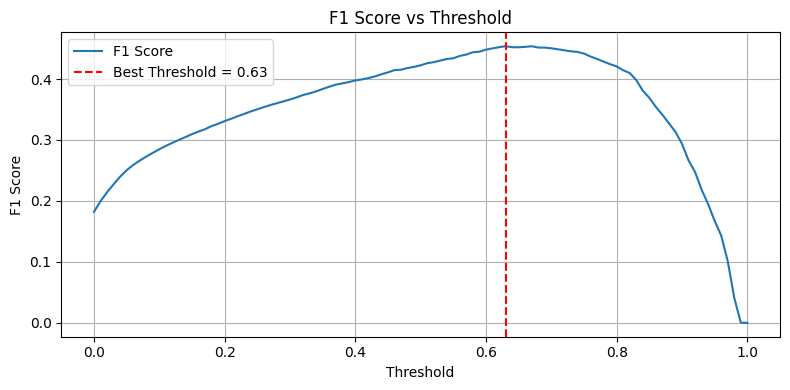

In [51]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=13.09729821196909,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_smenn, y_smenn)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test)[:, 1]

import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# Tìm ngưỡng tốt nhất
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best Threshold: {best_thresh}, Best F1 Score : {best_f1}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
# SCALE_POS_WEIGHT = 13.09729821196909

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "depth": trial.suggest_int("depth", 4, 8),  # Đừng quá cao
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),  # Giảm rate
        "task_type": 'GPU',
        "random_seed": 42,
        "verbose": 0,
    }

    model = CatBoostClassifier(**params)
    model.fit(X_smenn, y_smenn)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    # 'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_smenn, y_smenn)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 07:15:19,820] A new study created in memory with name: no-name-c91298bd-d04e-4efb-ab57-161f10251f1b
[I 2025-05-04 07:15:22,698] Trial 0 finished with value: 0.43970760560236594 and parameters: {'iterations': 457, 'depth': 4, 'learning_rate': 0.0473606478288688}. Best is trial 0 with value: 0.43970760560236594.
[I 2025-05-04 07:15:27,093] Trial 1 finished with value: 0.4183385706228345 and parameters: {'iterations': 385, 'depth': 7, 'learning_rate': 0.07886668516430308}. Best is trial 0 with value: 0.43970760560236594.
[I 2025-05-04 07:15:30,035] Trial 2 finished with value: 0.4272706404468589 and parameters: {'iterations': 330, 'depth': 5, 'learning_rate': 0.11819623068781562}. Best is trial 0 with value: 0.43970760560236594.
[I 2025-05-04 07:15:36,378] Trial 3 finished with value: 0.4044544263522366 and parameters: {'iterations': 484, 'depth': 8, 'learning_rate': 0.1341268280080361}. Best is trial 0 with value: 0.43970760560236594.
[I 2025-05-04 07:15:39,689] Trial 4 fin

Best trial:
FrozenTrial(number=8, state=1, values=[0.45988851187590896], datetime_start=datetime.datetime(2025, 5, 4, 7, 15, 54, 289029), datetime_complete=datetime.datetime(2025, 5, 4, 7, 15, 56, 234642), params={'iterations': 128, 'depth': 6, 'learning_rate': 0.10042163288898887}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=8, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.15, log=False, low=0.01, step=None)}, trial_id=8, value=None)
Best F1 Score: 0.45988851187590896
Best hyperparameters:
iterations: 128
depth: 6
learning_rate: 0.10042163288898887

Classification report with threshold = 0.63:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     50316
           1       0.33      0.68      0.44      5599

    accuracy                           0.83     55915
   macro avg       0.64      0.

In [ ]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=434,
#     depth=6,
#     learning_rate=0.097919302671831,
#     # scale_pos_weight=13.09729821196909,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_smenn, y_smenn)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.77
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

**Tuning CatBoost SMOTE ENN và đã chuẩn hóa với Optuna**

Best Threshold: 0.67, Best F1 Score : 0.4560214598334039


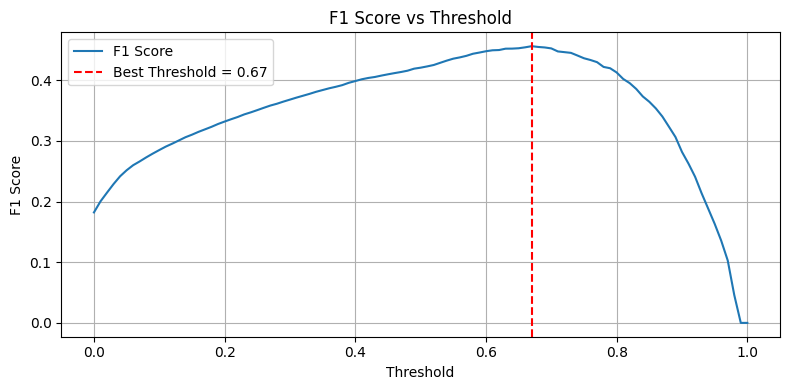

In [53]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Huấn luyện mô hình với scale_pos_weight
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    task_type='GPU',
    depth=6,
    # scale_pos_weight=13.09729821196909,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train_scaled, y_smenn)

# Dự đoán xác suất
y_probs = cat_model.predict_proba(X_test_scaled)[:, 1]

import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# Tìm ngưỡng tốt nhất
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best Threshold: {best_thresh}, Best F1 Score : {best_f1}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

THRESHOLD = best_thresh
# SCALE_POS_WEIGHT = 13.09729821196909

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500),
        "depth": trial.suggest_int("depth", 4, 8),  # Đừng quá cao
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),  # Giảm rate
        "task_type": 'GPU',
        "random_seed": 42,
        "verbose": 0,
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train_scaled, y_smenn)

    # Dự đoán xác suất và áp dụng threshold
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_probs >= THRESHOLD).astype(int)

    # Đánh giá bằng F1-score cho lớp mất cân bằng
    score = f1_score(y_test, y_pred)
    return score

# Tạo và chạy study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# In kết quả tốt nhất
print("Best trial:")
print(study.best_trial)
print("Best F1 Score:", study.best_value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

# Huấn luyện lại với tham số tốt nhất
best_params = study.best_trial.params
best_params.update({
    # 'scale_pos_weight': SCALE_POS_WEIGHT,
    'random_seed': 42,
    'verbose': 0
})

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train_scaled, y_smenn)

# Dự đoán với threshold 
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_thresh = (y_probs >= THRESHOLD).astype(int)

# In kết quả
from sklearn.metrics import classification_report
print(f"\nClassification report with threshold = {THRESHOLD}:")
print(classification_report(y_test, y_pred_thresh))

[I 2025-05-04 07:18:13,256] A new study created in memory with name: no-name-4e13ea6b-442b-4c67-a839-1813a8512c43
[I 2025-05-04 07:18:15,595] Trial 0 finished with value: 0.433234882636406 and parameters: {'iterations': 156, 'depth': 8, 'learning_rate': 0.1110978109722512}. Best is trial 0 with value: 0.433234882636406.
[I 2025-05-04 07:18:21,385] Trial 1 finished with value: 0.4142124923985753 and parameters: {'iterations': 444, 'depth': 8, 'learning_rate': 0.07058468734469456}. Best is trial 0 with value: 0.433234882636406.
[I 2025-05-04 07:18:25,581] Trial 2 finished with value: 0.40874797058542645 and parameters: {'iterations': 489, 'depth': 6, 'learning_rate': 0.10761631732874002}. Best is trial 0 with value: 0.433234882636406.
[I 2025-05-04 07:18:27,465] Trial 3 finished with value: 0.45055390435017567 and parameters: {'iterations': 173, 'depth': 4, 'learning_rate': 0.12884843152248643}. Best is trial 3 with value: 0.45055390435017567.
[I 2025-05-04 07:18:30,850] Trial 4 finished

Best trial:
FrozenTrial(number=16, state=1, values=[0.459515911045583], datetime_start=datetime.datetime(2025, 5, 4, 7, 19, 2, 508432), datetime_complete=datetime.datetime(2025, 5, 4, 7, 19, 4, 434026), params={'iterations': 155, 'depth': 5, 'learning_rate': 0.09204616239199073}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=500, log=False, low=100, step=1), 'depth': IntDistribution(high=8, log=False, low=4, step=1), 'learning_rate': FloatDistribution(high=0.15, log=False, low=0.01, step=None)}, trial_id=16, value=None)
Best F1 Score: 0.459515911045583
Best hyperparameters:
iterations: 155
depth: 5
learning_rate: 0.09204616239199073

Classification report with threshold = 0.67:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     50316
           1       0.35      0.65      0.45      5599

    accuracy                           0.84     55915
   macro avg       0.65      0.76  

In [ ]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, classification_report, confusion_matrix
# )
# # Tạo mô hình với tham số đã tối ưu
# catboost_model = CatBoostClassifier(
#     iterations=452,
#     depth=4,
#     learning_rate=0.12655128193358028,
#     # scale_pos_weight=13.09729821196909,
#     random_seed=42,
#     verbose=0
# )

# # Huấn luyện mô hình
# catboost_model.fit(X_train_scaled, y_smenn)

# # Dự đoán xác suất
# y_probs = catboost_model.predict_proba(X_test_scaled)[:, 1]

# # Áp dụng threshold
# THRESHOLD = 0.76
# y_pred = (y_probs >= THRESHOLD).astype(int)

# # Đánh giá mô hình
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Threshold:", THRESHOLD)
# print("Accuracy :", acc)
# print("Precision:", prec)
# print("Recall   :", rec)
# print("F1 Score :", f1)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title(f'Confusion Matrix - CatBoost (Threshold = {THRESHOLD})')
# plt.show()

# 7. Kết luận

* Nếu **muốn mô hình ổn định, đơn giản, không xử lý dữ liệu phức tạp** → **Chọn mô hình gốc dùng `scale_pos_weight`**
* Nếu **ưu tiên recall cao nhất (bắt hết mưa)**, chấp nhận nhiều cảnh báo giả → **Chọn mô hình SMOTEENN + chuẩn hóa**
* Nếu **ưu tiên precision cao (giảm cảnh báo giả)**, chấp nhận một số mưa bị bỏ sót → **Chọn mô hình SMOTE**

Cả 3 mô hình có f1 bằng nhau.